In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# loading the noise:
N_m_v=20
N_m_theta=20
version=0
data=np.load("/central/groups/Avouac_lab/hkaveh/Data/LearnROM/2D/ML_EQ_Errors_N_m_v"+str(N_m_v)+"N_m_theta"+str(N_m_theta)+"version"+str(version)+".npz")

In [9]:
Errors=data["Errors"]

In [12]:
Errors.shape

(2444184, 40)

In [11]:
# find the mean and std of the error along the columns
inflation=1
mean_error=np.mean(Errors,axis=0)
cov_matrix = np.cov(Errors-mean_error, rowvar=False)
cov_matrix=cov_matrix*inflation
diag_cov_matrix=np.diag(cov_matrix)
# Create a diagonal matrix with the diagonal elements of the covariance matrix
print(diag_cov_matrix)
print(mean_error)
print(cov_matrix.shape)

[0.55098855 0.27171977 0.17654795 0.08932769 0.03753948 0.12318173
 0.03773844 0.02274779 0.0165304  0.0470226  0.03379696 0.02129202
 0.00934021 0.02172195 0.00878158 0.00596367 0.00301582 0.0136998
 0.00480487 0.00888292 0.29593523 0.23143733 0.13066449 0.07641905
 0.02822715 0.0833861  0.04793173 0.00894015 0.01519566 0.0168177
 0.01689157 0.01790479 0.01498624 0.00790753 0.00731855 0.00557153
 0.00724113 0.00372885 0.00304018 0.00309683]
[-5.92018016e-03  2.99556260e-03 -4.47690080e-03  2.69892099e-03
 -2.14500223e-04 -1.14791892e-03  1.71699851e-03 -1.12158897e-03
 -8.34821189e-04  2.08817864e-03 -1.57633172e-03  1.24389320e-03
  1.30249988e-04 -8.52612893e-04  2.03290893e-04  1.21356814e-04
 -3.68453257e-04 -4.62582555e-04  5.85293030e-04  8.50010230e-04
 -3.27336465e-03 -2.85065200e-03 -4.06763045e-03 -2.99049909e-03
 -1.04069837e-03 -1.41527014e-03 -2.28649931e-03  3.00665225e-04
  6.03144414e-04 -4.59634918e-04 -1.00346910e-03 -1.16575039e-03
  9.36718207e-04  3.43861399e-04 -

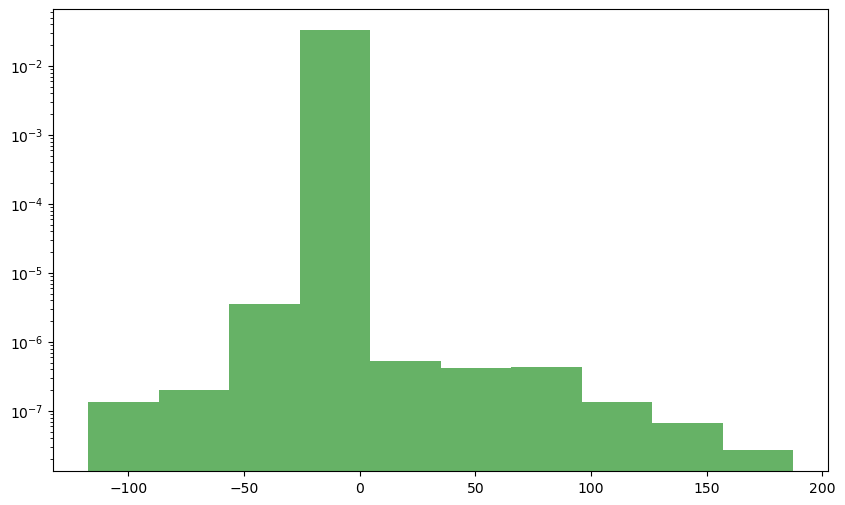

In [16]:
# plot the pdf of Error[] along one of the axis
error_alpha1=Errors[:,0] 
plt.figure(figsize=(10, 6))
plt.hist(error_alpha1, density=True, alpha=0.6, color='g', label='Histogram of Errors')
plt.yscale('log')

In [18]:
from scipy.stats import t, norm


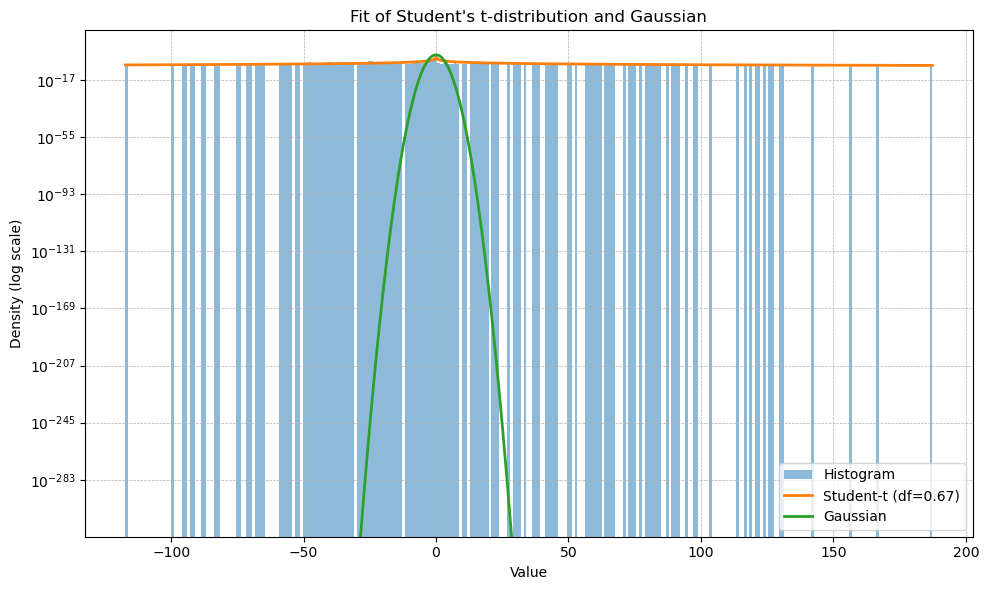

In [19]:
data = error_alpha1
df_t, loc_t, scale_t = t.fit(data)

# Fit Gaussian
mu_norm, std_norm = norm.fit(data)

# Generate x values for PDF plotting
x = np.linspace(np.min(data), np.max(data), 1000)

# Compute PDFs
pdf_t = t.pdf(x, df_t, loc=loc_t, scale=scale_t)
pdf_norm = norm.pdf(x, mu_norm, std_norm)

# Plot in log scale
plt.figure(figsize=(10, 6))
plt.hist(data, bins=300, density=True, alpha=0.5, label='Histogram', log=True)
plt.plot(x, pdf_t, label=f"Student-t (df={df_t:.2f})", linewidth=2)
plt.plot(x, pdf_norm, label="Gaussian", linewidth=2)
plt.yscale('log')
plt.xlabel("Value")
plt.ylabel("Density (log scale)")
plt.title("Fit of Student's t-distribution and Gaussian")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

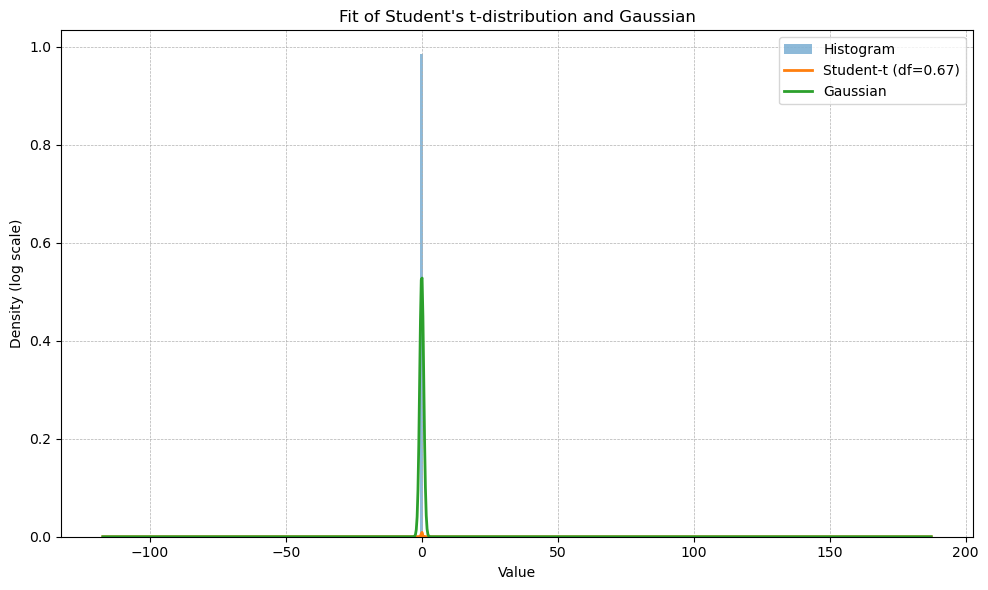

In [22]:
# Plot in log scale
plt.figure(figsize=(10, 6))
plt.hist(data, bins=300, density=True, alpha=0.5, label='Histogram')

plt.plot(x, pdf_t, label=f"Student-t (df={df_t:.2f})", linewidth=2)
plt.plot(x, pdf_norm, label="Gaussian", linewidth=2)
# plt.yscale('log')
plt.xlabel("Value")
plt.ylabel("Density (log scale)")
plt.title("Fit of Student's t-distribution and Gaussian")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

There is no built in function to fir multivariate student-t distribution in scipy, the normal distribution worked well in the SSEs. So for now, lets work with modeling noise as normal distribution. Also the data set has enough samples and I dont think there is a need to increase them. you can also add some inflation terms in the model.